In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
##loading the dataset
train = pd.read_csv("C:/Users/bamne/Downloads/Placement_Data_Full_Class.csv")

In [3]:
train.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
print(train.shape)

(215, 15)


In [5]:
train.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [6]:
feature_missing = [(feature for feature in train if train[feature].isnull().sum()>1)]

for feature in feature_missing:
    print(feature,np.round(train[feature].isnull().mean(),4), ' % missing values')

<generator object <genexpr> at 0x000001F0709853C8> salary    0.3116
dtype: float64  % missing values


In [7]:
train.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [8]:
train

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [9]:
num_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
print('Number of Numerical features are:', len(num_features))
num_features

Number of Numerical features are: 7


['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

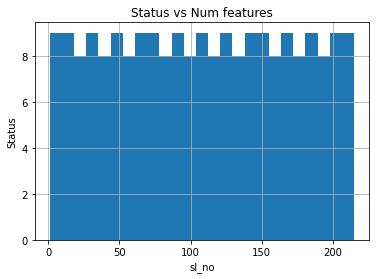

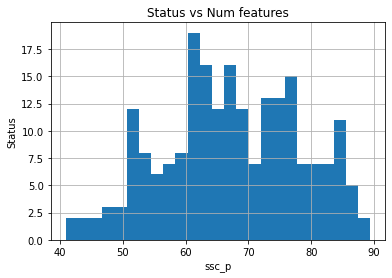

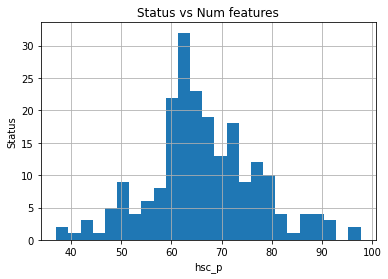

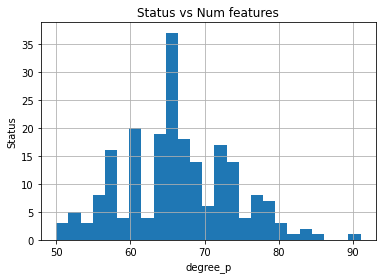

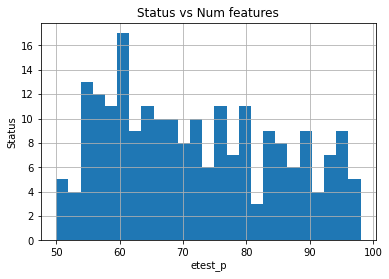

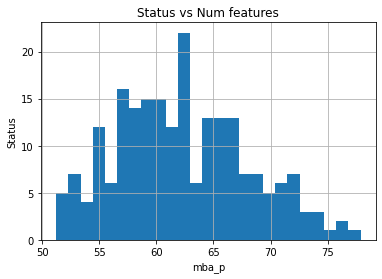

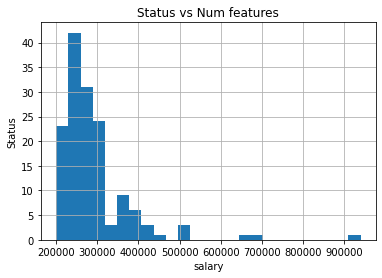

In [10]:
for feature in num_features:
    data=train.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Status')
    plt.title('Status vs Num features')
    plt.show()

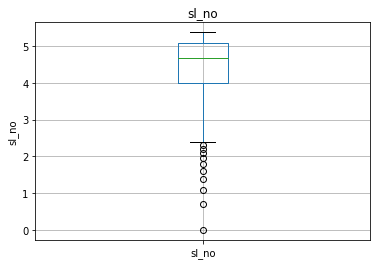

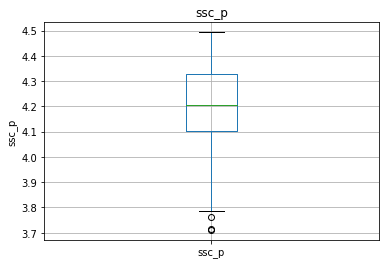

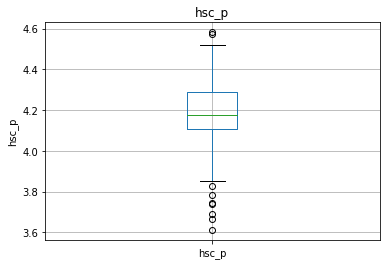

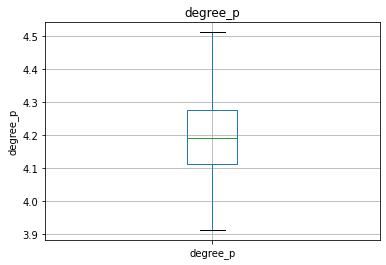

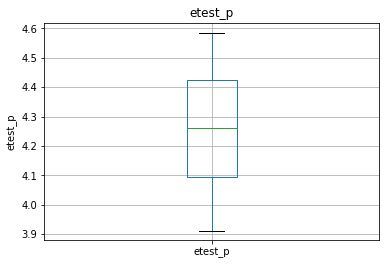

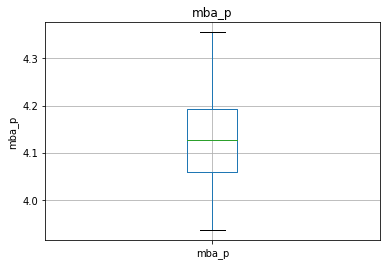

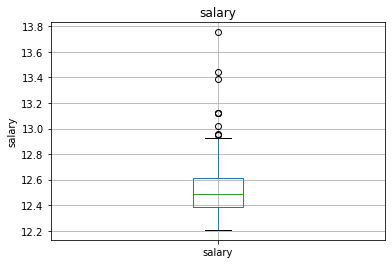

In [11]:
for feature in num_features:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

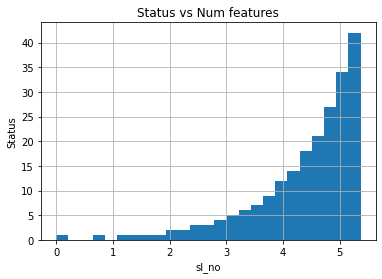

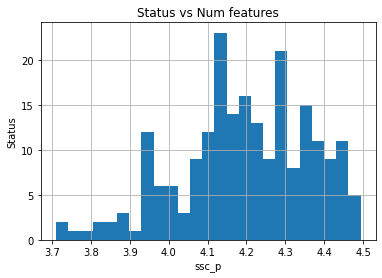

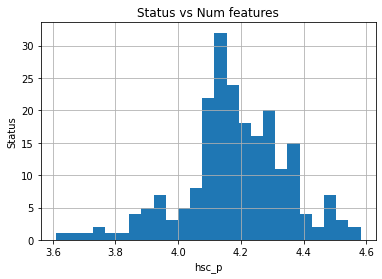

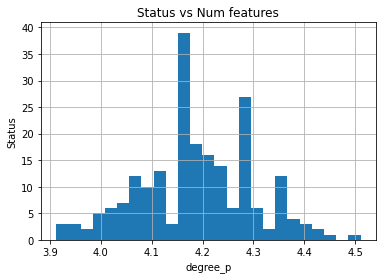

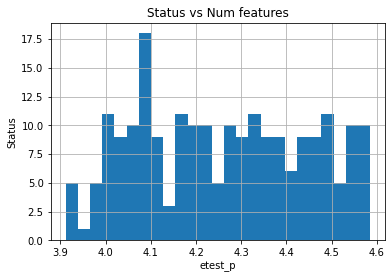

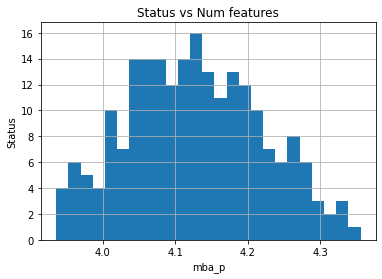

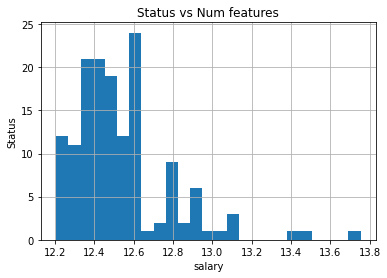

In [12]:
for feature in num_features:
    data=train.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel('Status')
        plt.title('Status vs Num features')
        plt.show()

In [13]:
cat_features = [feature for feature in train.columns if train[feature].dtypes == 'O']
print('Number of Categorical features are:', len(cat_features))
cat_features

Number of Categorical features are: 8


['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [14]:
for feature in cat_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train[feature].unique())))

The feature is gender and number of categories are 2
The feature is ssc_b and number of categories are 2
The feature is hsc_b and number of categories are 2
The feature is hsc_s and number of categories are 3
The feature is degree_t and number of categories are 3
The feature is workex and number of categories are 2
The feature is specialisation and number of categories are 2
The feature is status and number of categories are 2


In [15]:
for feature in cat_features:
    data=train.copy()
    print(pd.crosstab(data['status'], data[feature]))

gender       F    M
status             
Not Placed  28   39
Placed      48  100
ssc_b       Central  Others
status                     
Not Placed       38      29
Placed           78      70
hsc_b       Central  Others
status                     
Not Placed       27      40
Placed           57      91
hsc_s       Arts  Commerce  Science
status                             
Not Placed     5        34       28
Placed         6        79       63
degree_t    Comm&Mgmt  Others  Sci&Tech
status                                 
Not Placed         43       6        18
Placed            102       5        41
workex      No  Yes
status             
Not Placed  57   10
Placed      84   64
specialisation  Mkt&Fin  Mkt&HR
status                         
Not Placed           25      42
Placed               95      53
status      Not Placed  Placed
status                        
Not Placed          67       0
Placed               0     148


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
y = train[['status']]
x = train.drop('status',axis=1)
x = x.drop('sl_no',axis=1)
print(x)
y

    gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p   degree_t  \
0        M  67.00   Others  91.00   Others  Commerce     58.00   Sci&Tech   
1        M  79.33  Central  78.33   Others   Science     77.48   Sci&Tech   
2        M  65.00  Central  68.00  Central      Arts     64.00  Comm&Mgmt   
3        M  56.00  Central  52.00  Central   Science     52.00   Sci&Tech   
4        M  85.80  Central  73.60  Central  Commerce     73.30  Comm&Mgmt   
..     ...    ...      ...    ...      ...       ...       ...        ...   
210      M  80.60   Others  82.00   Others  Commerce     77.60  Comm&Mgmt   
211      M  58.00   Others  60.00   Others   Science     72.00   Sci&Tech   
212      M  67.00   Others  67.00   Others  Commerce     73.00  Comm&Mgmt   
213      F  74.00   Others  66.00   Others  Commerce     58.00  Comm&Mgmt   
214      M  62.00  Central  58.00   Others   Science     53.00  Comm&Mgmt   

    workex  etest_p specialisation  mba_p    salary  
0       No     55.0  

,status
0,Placed
1,Placed
2,Placed
3,Not Placed
4,Placed
...,...
210,Placed
211,Placed
212,Placed
213,Placed


In [18]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for feature in cat_features:
    if feature == 'status':
        continue
    else:
        x.loc[:,(feature)]=le.fit_transform(x.loc[:,(feature)])
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,NaN
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,204000.0


In [19]:
y.loc[:,('status')]=le.fit_transform(y.loc[:,('status')])
y

,status
0,1
1,1
2,1
3,0
4,1
...,...
210,1
211,1
212,1
213,1


In [20]:
x=x.drop('salary',axis=1)

In [21]:
x.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50


In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(x)
print(scaled)

[[ 0.73943397 -0.02808697  1.08245885 ... -1.29109087  1.12390297
  -0.59764672]
 [ 0.73943397  1.11336869 -0.92382264 ...  1.08715679 -0.88975652
   0.6876202 ]
 [ 0.73943397 -0.21323793 -0.92382264 ...  0.21890765 -0.88975652
  -0.76947385]
 ...
 [ 0.73943397 -0.02808697  1.08245885 ... -0.98909117 -0.88975652
   1.27870553]
 [-1.35238581  0.61994138  1.08245885 ... -0.15859198  1.12390297
  -0.35193393]
 [ 0.73943397 -0.49096436 -0.92382264 ...  1.27590661  1.12390297
  -0.3536522 ]]


In [23]:
x=pd.DataFrame(scaled)

In [24]:
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.739434,-0.028087,1.082459,2.268812,0.800763,-0.641955,-1.140102,1.576284,-0.724446,-1.291091,1.123903,-0.597647
1,0.739434,1.113369,-0.923823,1.103448,0.800763,1.083298,1.513267,1.576284,1.380364,1.087157,-0.889757,0.687620
2,0.739434,-0.213238,-0.923823,0.153313,-1.248809,-2.367207,-0.322843,-0.675550,-0.724446,0.218908,-0.889757,-0.769474
3,0.739434,-1.046417,-0.923823,-1.318339,-1.248809,1.083298,-1.957362,1.576284,-0.724446,-0.460592,1.123903,-0.489396
4,0.739434,1.712332,-0.923823,0.668391,-1.248809,-0.641955,0.943909,-0.675550,-0.724446,1.864806,-0.889757,-1.164676
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0.739434,1.230940,1.082459,1.441008,0.800763,-0.641955,1.529612,-0.675550,-0.724446,1.426906,-0.889757,2.098321
211,0.739434,-0.861266,1.082459,-0.582513,0.800763,1.083298,0.766836,1.576284,-0.724446,0.143408,-0.889757,-1.487711
212,0.739434,-0.028087,1.082459,0.061335,0.800763,-0.641955,0.903046,-0.675550,1.380364,-0.989091,-0.889757,1.278706
213,-1.352386,0.619941,1.082459,-0.030644,0.800763,-0.641955,-1.140102,-0.675550,-0.724446,-0.158592,1.123903,-0.351934


In [25]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=11)) # remember to set the seed, the random state in this function
feature_sel_model.fit(x,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=11))

In [26]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True])

In [27]:
selected_feat = x.columns[(feature_sel_model.get_support())]

In [28]:
x=x[selected_feat]

In [29]:
from sklearn.model_selection import train_test_split
np.random.seed(22)
(x_train,x_test,y_train,y_test) = train_test_split(x,y,test_size=0.40,random_state=1)

In [30]:
print(x_train)

           0         1         2         3         4         6         7   \
54  -1.352386  0.619941 -0.923823 -0.582513  0.800763  0.358207 -0.675550   
102 -1.352386  0.897668  1.082459 -0.490535  0.800763  0.221997 -0.675550   
124  0.739434 -0.028087 -0.923823  0.429247 -1.248809 -0.277894  0.450367   
105  0.739434 -0.768691 -0.923823 -0.214600  0.800763 -1.140102  1.576284   
98  -1.352386  0.157064 -0.923823  0.613204 -1.248809 -0.186633 -0.675550   
..        ...       ...       ...       ...       ...       ...       ...   
203  0.739434 -1.076041  1.082459 -0.460182  0.800763 -1.294019 -0.675550   
137  0.739434 -0.028087  1.082459 -0.306578 -1.248809  0.766836 -0.675550   
72   0.739434  1.625311  1.082459  0.061335  0.800763  1.584096 -0.675550   
140  0.739434 -0.213238 -0.923823 -0.141018  0.800763  0.426312 -0.675550   
37  -1.352386  1.082819 -0.923823  0.889139 -1.248809 -0.104907  1.576284   

           8         9         10        11  
54  -0.724446  0.445407  1.12

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier(n_estimators=1000,max_depth=25,random_state=42,min_samples_split=2,min_samples_leaf=1,max_features='sqrt').fit(x_train,y_train)
cv_scores=cross_val_score(clf,x_train,y_train,cv=10)
cv_scores.mean()

0.851923076923077

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [33]:
predictions = clf.predict(x_test)

In [34]:
predictions = predictions.reshape(86,1)
predictions

array([[1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [35]:
y_test.shape

(86, 1)

<AxesSubplot:ylabel='Density'>

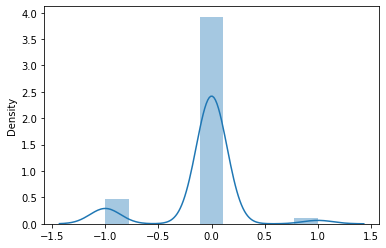

In [36]:
import seaborn as sns
sns.distplot(y_test-predictions)

In [37]:
cv_scores = cross_val_score(clf, x_test, y_test.values.ravel(),cv=10)

In [38]:
cv_scores.mean()

0.8736111111111111

In [39]:
pres = precision_score(y_test,predictions)
pres

0.8656716417910447

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.12790697674418605
MSE: 0.12790697674418605
RMSE: 0.3576408488192953


In [41]:
import pickle
# open a file, where you ant to store the data
#WB means write byte mode
file = open('random_forest_classifier_placed_model.pkl', 'wb')

# dump information to that file
pickle.dump(clf, file)